In [1]:
import cv2
import random
import numpy  as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot    as plt
from sklearn.metrics import confusion_matrix
from keras.models    import Sequential, load_model
from keras.layers    import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils     import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

2024-05-30 05:30:55.119868: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 05:30:55.162550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 05:30:55.162591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 05:30:55.163822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 05:30:55.171093: I tensorflow/core/platform/cpu_feature_guar

In [2]:
TF_ENABLE_ONEDNN_OPTS=0

In [3]:
Train_Images = pd.read_csv("dataset/csvTrainImages 13440x1024.csv")
Train_Labels = pd.read_csv("dataset/csvTrainLabel 13440x1.csv")

Test_Images = pd.read_csv("dataset/csvTestImages 3360x1024.csv")
Test_Labels = pd.read_csv("dataset/csvTestLabel 3360x1.csv")

In [4]:
Train_Images

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f"Train Iamges Shape : {Train_Images.shape}")
print(f"Test  Iamges Shape : {Test_Images.shape}")

print(f"Train Labels Shape : {Train_Labels.shape}")
print(f"Test  Labels Shape : {Test_Labels.shape}")

Train Iamges Shape : (13439, 1024)
Test  Iamges Shape : (3359, 1024)
Train Labels Shape : (13439, 1)
Test  Labels Shape : (3359, 1)


In [6]:
arabic_chars = {0: 'alif',
                1: 'ba',
                2: 'ta',
                3: 'tsa',
                4: 'jim',
                5: 'hâ',
                6: 'khâ',
                7: 'dal',
                8: 'dzal',
                9: 'ra',
                10: 'zai',
                11: 'sîn',
                12: 'syîn',
                13: 'shâd',
                14: 'dhâd',
                15: 'thâ',
                16: 'zhâ',
                17: 'âin',
                18: 'ghain',
                19: 'fa',
                20: 'qâf',
                21: 'kâf',
                22: 'lam',
                23: 'mîm',
                24: 'nun',
                25: 'Ha',
                26: 'waw',
                27: 'yâ'
               }

In [7]:
X_train = Train_Images.to_numpy()
Y_train = Train_Labels.to_numpy()-1 

X_test = Test_Images.to_numpy()
Y_test = Test_Labels.to_numpy()-1
print(f"X_Train Shape : {X_train.shape}")
print(f"X_Test  Shape : {X_test.shape}")
print(f"Y_Train Shape : {Y_train.shape}")
print(f"Y_Test  Shape : {Y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


In [8]:
X_train = X_train.reshape(-1,32,32,1) / 255.0
X_test  = X_test.reshape(-1,32,32,1)  / 255.0

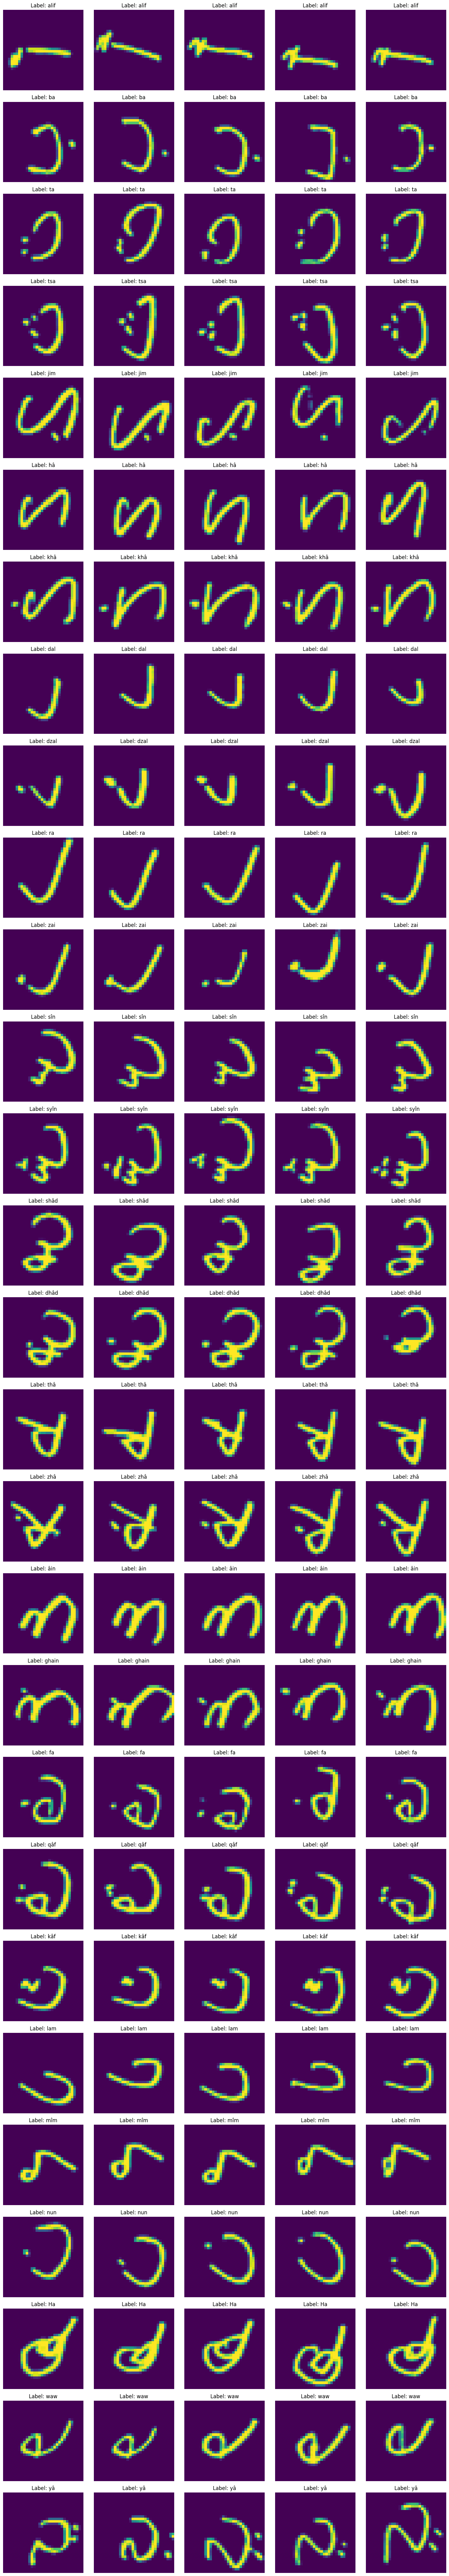

In [9]:
unique_labels = np.unique(Y_train)
num_images_per_label = 5
num_rows = len(unique_labels)
num_cols = num_images_per_label
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
for row, label in enumerate(unique_labels):
    indices = np.where(Y_train == label)[0]    
    for col, index in enumerate(indices[:num_images_per_label]):
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(X_train[index])
        ax.set_title(f"Label: {arabic_chars[int(label)]}")
        ax.axis('off')
for i in range(num_rows * num_cols - len(unique_labels)):
    axes.flatten()[-(i + 1)].axis('off')
plt.tight_layout()
plt.show()

In [10]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)
print(Y_train.shape,Y_test.shape)

(13439, 28) (3359, 28)


In [11]:
class ArabicCNN():
    def __init__(self, input_shape=(32, 32, 1), num_classes=28):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.strategy = tf.distribute.MirroredStrategy()  # Create MirroredStrategy
        self.model = self.build_model()

    def build_model(self):
        with self.strategy.scope():  # Apply the strategy's scope
            model = Sequential([
                Conv2D(64, (5, 5), padding="same", activation="relu", input_shape=self.input_shape),
                Conv2D(64, (3, 3), activation="relu"),
                MaxPooling2D((2, 2)),
                BatchNormalization(),
                Conv2D(128, (5, 5), padding="same", activation="relu"),
                Conv2D(128, (3, 3), activation="relu"),
                MaxPooling2D((2, 2)),
                BatchNormalization(),
                Conv2D(256, (3, 3), padding="same", activation="relu"),
                Conv2D(256, (2, 2), activation="relu"),
                MaxPooling2D((2, 2)),
                BatchNormalization(),
                Flatten(),
                Dense(512, activation="relu"),
                Dropout(0.5),
                Dense(256, activation="relu"),
                Dropout(0.5),
                Dense(self.num_classes, activation="softmax")
            ])
        return model

    def compile_model(self):
        self.model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

    def summary(self):
        self.model.summary()
    
    def fit_model(self, train_gen, epochs, verbose=1, steps_per_epoch=None, validation_data=None, validation_steps=None, callbacks=None):
        history = self.model.fit(
            train_gen,
            epochs=epochs,
            verbose=verbose,
            steps_per_epoch=steps_per_epoch,
            validation_data=validation_data,
            validation_steps=validation_steps,
            callbacks=callbacks
        )
        return history
    
    def predict(self, x):
        return self.model.predict(x)
    
    def save(self):
        return self.model.save("300524_arabic_model.h5")

model = ArabicCNN()
model.compile_model()
model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2024-05-30 05:31:11.043208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9787 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5
2024-05-30 05:31:11.043969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9787 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5
2024-05-30 05:31:11.044487: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9787 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:86:00.0, compute capability: 7.5
2024-05-30 05:31:11.045047: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 9787 MB memory:  -> device: 3, name: NVIDIA GeForce RTX

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d 

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode ="nearest"
)
# test_datagen = ImageDataGenerator()
train_gen = datagen.flow(X_train, Y_train, batch_size=32)
test_gen  = datagen.flow(X_test , Y_test , batch_size=32)

In [13]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

history = model.fit_model(
    train_gen,
    epochs=100,
    verbose=1,
    steps_per_epoch=X_train.shape[0] // 32,
    validation_data=test_gen,
    validation_steps=X_test.shape[0] // 32,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/100
INFO:tensorflow:Collective all_reduce tensors: 24 all_reduces, num_devices = 4, group_size = 4, implementation = CommunicationImplementation.NCCL, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Collective all_reduce tensors: 24 all_reduces, num_devices = 4, group_size = 4, implementation = CommunicationImplementation.NCCL, num_packs = 1


2024-05-30 05:31:20.671579: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-30 05:31:20.693136: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-30 05:31:20.716989: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-30 05:31:20.741492: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-30 05:31:23.545280: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe258670e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-30 05:31:23.545362: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-05-30 05:31:23.545382: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-05-30 05:31:23.545398

418/419 [============================>.] - ETA: 0s - loss: 2.4832 - accuracy: 0.2669
Epoch 1: val_accuracy improved from -inf to 0.12350, saving model to best.keras
419/419 [==============================] - 26s 32ms/step - loss: 2.4827 - accuracy: 0.2672 - val_loss: 3.7365 - val_accuracy: 0.1235
Epoch 2/100
419/419 [==============================] - ETA: 0s - loss: 1.2255 - accuracy: 0.5958
Epoch 2: val_accuracy improved from 0.12350 to 0.66316, saving model to best.keras
419/419 [==============================] - 12s 28ms/step - loss: 1.2255 - accuracy: 0.5958 - val_loss: 0.9368 - val_accuracy: 0.6632
Epoch 3/100
418/419 [============================>.] - ETA: 0s - loss: 0.7969 - accuracy: 0.7469
Epoch 3: val_accuracy improved from 0.66316 to 0.79477, saving model to best.keras
419/419 [==============================] - 12s 29ms/step - loss: 0.7969 - accuracy: 0.7467 - val_loss: 0.6691 - val_accuracy: 0.7948
Epoch 4/100
419/419 [==============================] - ETA: 0s - loss: 0.595

In [14]:
model.save()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
def predict_image(image_path, model_path, arabic_chars):
    model = load_model(model_path)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)  # Invert colors
    img = cv2.resize(img, (32, 32))
    img = img.reshape(-1, 32, 32, 1)
    img = img.astype('float32') / 255.0

    pred = model.predict(img)
    predicted_label = arabic_chars[np.argmax(pred)]

    return predicted_label


def plot_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage
model_path = "300524_arabic_model.h5"
image_path = "ya.jpg"

predicted_label = predict_image(image_path, model_path, arabic_chars)
print("Predicted label:", predicted_label)

plot_image(image_path)

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
